In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob
import matplotlib.cm as cm
import scipy.spatial
from netCDF4 import Dataset
from wrf import getvar
import os 
import wrf
from wrf import ALL_TIMES
import time


In [5]:
exp = 'UCM'
dom = 'd02'
fpath = '/Users/ascott47/mountpoint/wrf/out/'
files = list(np.sort(glob.glob(fpath+'%s/%s/wrfout_*'%(exp, dom))))

In [6]:
ds = xr.open_dataset(files[0])

In [9]:
toc = time.time()
ds.T2
print(time.time()-toc)

0.000783920288086


In [8]:
tic = time.time()
ds['T2']
print(time.time()-tic)

0.000903844833374


In [10]:
xr.__version__

'0.9.5'

In [18]:
toc = time.time()
ds = xr.open_mfdataset(files[0:500], decode_cf=False, autoclose = True, concat_dim = 'Time')
tu = ds.T2.sel(south_north =140 , west_east =85  )
print(time.time()-toc)

591.725018024


In [21]:
591/60.

9.85

In [19]:
toc = time.time()
tr = ds.T2.sel(south_north =109 , west_east =87  )
print(time.time()-toc)

0.00902485847473


212.82647109


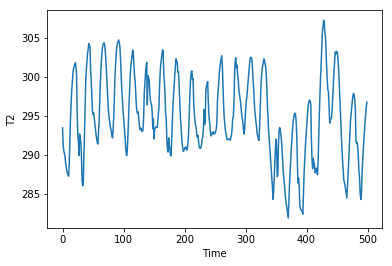

In [22]:
toc= time.time()
tr.plot()
print(time.time()-toc)

In [14]:
toc = time.time()
ds = xr.open_mfdataset(files[0:5], decode_cf=False, autoclose = True, concat_dim = 'Time').T2.sel(south_north =140 , west_east =85  )
print(time.time()-toc)

4.57662987709


In [ ]:
toc = time.time()
tr = ds.T2.sel(south_north =109 , west_east =87  )
print(time.time()-toc)

In [11]:
ds.sel?

In [14]:
ds.dims

Frozen(SortedKeysDict({u'bottom_top': 112, u'south_north': 150, u'west_east_stag': 151, u'bottom_top_stag': 113, u'soil_layers_stag': 4, u'Time': 25, u'west_east': 150, u'south_north_stag': 151}))

In [12]:
ds.coords

Coordinates:
    XLAT     (Time, south_north, west_east) float32 36.8249 36.8257 36.8265 ...
    XLONG    (Time, south_north, west_east) float32 -78.6853 -78.6508 ...
    XTIME    (Time) datetime64[ns] 2016-05-25 2016-05-25T01:00:00 ...
    XLAT_U   (Time, south_north, west_east_stag) float32 36.8244 36.8253 ...
    XLONG_U  (Time, south_north, west_east_stag) float32 -78.7026 -78.6681 ...
    XLAT_V   (Time, south_north_stag, west_east) float32 36.8111 36.8119 ...
    XLONG_V  (Time, south_north_stag, west_east) float32 -78.6848 -78.6503 ...

In [15]:
#-76.611088 	39.281527
#85 	140
tu = ds['T2'].sel(south_north =140 , west_east =85  )